In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import folium 
import requests
import json
from geopy.distance import geodesic


final_hdb_resale_prices = pd.read_csv("hdb_model_data_regression.csv")

In [5]:
final_hdb_resale_prices.tail()

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
77829,8,146.0,20064,30370.0,780,1182.415251,15623.76672,0,6158.429452
77830,8,142.0,20064,30370.0,766,661.035324,15234.07761,0,5859.823380
77831,8,142.0,20064,30370.0,766,661.035324,15234.07761,0,5776.556939
77832,11,146.0,20064,30370.0,768,573.471701,15246.85376,0,5743.008767
77833,5,142.0,20064,30370.0,768,573.471701,15246.85376,0,5545.101408


In [10]:
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, RidgeClassifier
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
# from mlxtend.regressor import StackingCVRegressor
# import lightgbm as lgb
# from lightgbm import LGBMRegressor
# from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd



# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#Linear Regression

In [13]:
features = ['storey_range','floor_area_sqm','no.of bto','resale application','remaining_lease_months','Distance to nearest MRT','Distance to CBD','isMatureEstate']
X = final_hdb_resale_prices[features]
y = final_hdb_resale_prices['cpi_adjusted_price_per_sqm']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

In [15]:
scaler = StandardScaler()

In [16]:
X_train.head()

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate
30358,5,91.0,13756,26436.0,708,932.069073,15095.75605,0
59440,8,112.0,20064,30370.0,1119,1200.736904,14855.49179,0
71088,8,102.0,20064,30370.0,883,1520.261819,12713.89155,1
46493,5,125.0,13756,26436.0,802,1061.696877,12088.05824,1
77270,8,149.0,20064,30370.0,828,1750.734973,10049.92302,1


In [17]:
#Linear Regression Model

In [18]:
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [19]:
final_hdb_resale_prices

,storey_range,floor_area_sqm,no.of bto,resale application,remaining_lease_months,Distance to nearest MRT,Distance to CBD,isMatureEstate,cpi_adjusted_price_per_sqm
0,5,73.0,7314,26436.0,667,908.970521,9026.295266,1,3619.754795
1,20,70.0,7314,26436.0,1100,687.185319,9015.122154,1,6695.082857
2,2,73.0,7314,26436.0,676,586.980690,8949.443986,1,3141.673973
3,5,73.0,7314,26436.0,663,800.631299,9123.690385,1,3824.646575
4,8,68.0,7314,26436.0,708,927.322849,9734.443856,1,3226.041176
...,...,...,...,...,...,...,...,...,...
77829,8,146.0,20064,30370.0,780,1182.415251,15623.766720,0,6158.429452
77830,8,142.0,20064,30370.0,766,661.035324,15234.077610,0,5859.823380
77831,8,142.0,20064,30370.0,766,661.035324,15234.077610,0,5776.556939
77832,11,146.0,20064,30370.0,768,573.471701,15246.853760,0,5743.008767


In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 

5367.774490044048
[ 360.76495965  -50.84616866  452.72857088  152.66291826  848.11856587
 -290.5935448  -635.98449107  276.95541926]


In [21]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
75439,5275.212712,5259.001463
15416,3677.975410,4359.571323
24537,4813.239130,4544.013243
33177,4661.833333,4896.537570
49716,3548.411765,4302.759711
...,...,...
7492,4466.356250,3988.814390
11899,3233.967568,2478.288892
27046,4923.130435,5580.261874
56055,7496.786364,6893.880905


Text(0, 0.5, 'Predictions')

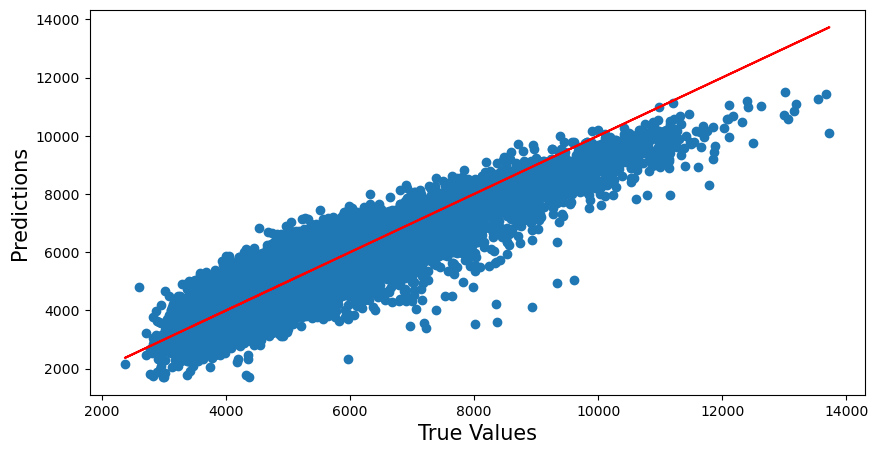

In [22]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

In [23]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 510.3328041720197
MSE: 436959.7425496899
RMSE: 661.0293053637561
VarScore: 0.7976958275092356


In [25]:
r2 = metrics.r2_score(y_test, y_pred).round(2)
print("Coefficient of determination test(R2): %.2f" % metrics.r2_score(y_test, y_pred).round(2))

# adjusted r-sqaured (idk if this formula correct)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2: ", adj_r2)

Coefficient of determination test(R2): 0.80
Adjusted R2:  0.7998971590178687
